In [1]:
%load_ext autoreload
%autoreload 2



In [2]:
from sqlalchemy import create_engine
from sshtunnel import SSHTunnelForwarder
import testing
import matplotlib.pyplot as plt
from time import time
import numpy as np
ip = "147.32.83.171"

C:\Users\zdesi\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [9]:
f = open("found_arb.txt")
ids = f.read()
ids = ids.split("\n")
ids = [i for i in ids[:-1]]

ssh_tunnel = SSHTunnelForwarder(
    ip,
        ssh_username='syrovzde',
        ssh_private_key='C:\\Users\\zdesi\\.ssh\\syrovzde_rsa',
        remote_bind_address=('localhost', 5432)
    )
ssh_tunnel.start()
engine = create_engine("postgresql://{user}@{host}:{port}/{db}".format(
        host='localhost',
        port=ssh_tunnel.local_bind_port,
        user='syrovzde',
        db='asianodds'
    ))
result_engine = create_engine("postgresql://{user}@{host}:{port}/{db}".format(
        host='localhost',
        port=ssh_tunnel.local_bind_port,
        user='syrovzde',
        db='betexplorer'
    ))
print("completed")


completed


In [10]:
matchids = []
for i in ids:
    if i not in matchids:
        matchids.append(i)

In [11]:
profits,betting_vectors,arb_ids=testing.test(p=1,matchids=matchids,res_engine=result_engine,engine=engine)


84
Academic license - for non-commercial use only - expires 2023-11-03
Using license file C:\Users\zdesi\gurobi.lic


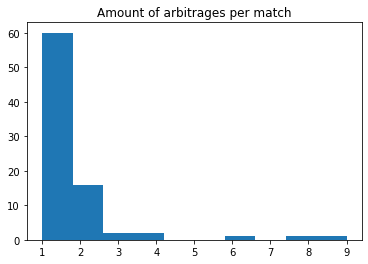

In [21]:



last_arb = 0
hist = []
count = 0
for arb in arb_ids:
    if count == 0:
        count = 1
        last_arb = arb
        continue
    if last_arb == arb:
        count += 1
        last_arb = arb
        continue
    hist.append(count)
    count = 1
    last_arb = arb


plt.hist(hist)
plt.title("Amount of arbitrages per match")
plt.show()


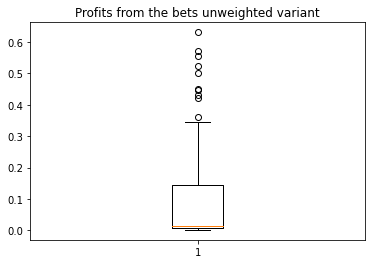

In [24]:
values = []
for i in range(len(profits)):
    values.append(profits[i]/sum(betting_vectors[i]))

plt.boxplot(values)
plt.title("Profits from the bets unweighted variant")
plt.show()

84


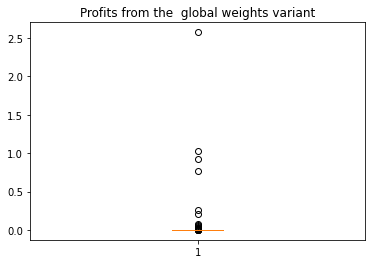

In [40]:
profits_w,betting_vectors_w,arb_ids_w=testing.test(p=1,matchids=matchids,res_engine=result_engine,engine=engine,weighted=True)

values_w = []
for i in range(len(profits_w)):
    values_w.append(profits_w[i]/sum(betting_vectors_w[i]))

plt.boxplot(values_w)
plt.title("Profits from the  global weights variant")
plt.show()
#logarithmic scale

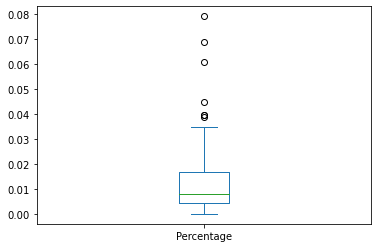

In [29]:
import pandas as pd
df = pd.read_csv("RebelBetting.csv")
df = df[df['BetType']== 'Arb']
df["Percentage"].plot.box(title='Rebelbetting')

84


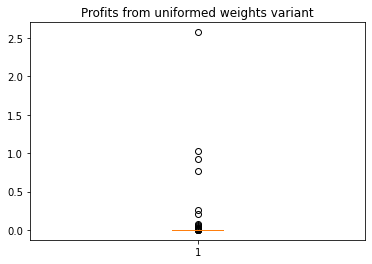

In [39]:
profits_u,betting_vectors_u,arb_ids_u=testing.test(p=1,matchids=matchids,res_engine=result_engine,engine=engine,weighted=True)

values_u = []
for i in range(len(profits_u)):
    values_u.append(profits_u[i]/sum(betting_vectors_u[i]))

plt.boxplot(values_u)
plt.title("Profits from uniformed weights variant")
plt.show()
#logarithmic scale